<a href="https://colab.research.google.com/github/nebaraka/dissertation/blob/main/Dissertation_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import tensorflow_hub as hub
import os
import zipfile
import re
from skimage.transform import rescale, resize
import numpy as np
import pandas as pd
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras import Sequential
from keras.callbacks import TensorBoard
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from keras.layers import Reshape
import IPython.display as display
import datetime
import seaborn
from google.colab import files
from sklearn import manifold

In [3]:
with zipfile.ZipFile('drive/MyDrive/In-shop Clothes Retrieval Benchmark/Img/img.zip', 'r') as zip_ref:
     zip_ref.extractall('img')

In [4]:
PATH = 'img/img/WOMEN/'

In [5]:
labels = os.listdir(PATH)

In [6]:
a = np.zeros(len(labels))

In [7]:
l_to_n = {}

In [8]:
for i in range(len(labels)):
  num = np.zeros(len(labels))
  num[i] = 1
  l_to_n[labels[i]] = num

In [9]:
n_to_l = {np.argmax(v):k for k, v in l_to_n.items()}

In [10]:
%%time
X = []
Y = []
for folder in os.listdir(PATH):
  for subfolder in os.listdir(PATH + folder):
    for img in os.listdir(PATH + folder + '/' + subfolder):
      if bool(re.fullmatch(".*front.*", img)):
          X.append(resize(tf.image.convert_image_dtype(tf.image.decode_jpeg(
              tf.io.read_file(PATH + folder + '/' + subfolder + '/' + img)), tf.float32), (224, 224, 3),
                       anti_aliasing=True))
          Y.append(l_to_n[folder])
          break

CPU times: user 1min 37s, sys: 1min 32s, total: 3min 9s
Wall time: 1min 36s


In [11]:
X = np.array(X)
Y = np.array(Y)

In [13]:
model = tf.keras.models.load_model("women100mobile-net.h5",custom_objects={'KerasLayer':hub.KerasLayer})

In [14]:
f_ext = tf.keras.Sequential([
    model.layers[0]
])
X_enc = f_ext.predict(X)

In [15]:
X_emb = manifold.TSNE(n_components=2).fit_transform(X_enc.reshape(X_enc.shape[0], 1664))


to_vis = pd.concat([pd.DataFrame(X_emb), pd.DataFrame(np.argmax(Y, axis=1))], axis=1)
to_vis.columns = ['x', 'y', 'Class']

In [16]:
n_to_l

{0: 'Rompers_Jumpsuits',
 1: 'Skirts',
 2: 'Denim',
 3: 'Tees_Tanks',
 4: 'Blouses_Shirts',
 5: 'Dresses',
 6: 'Shorts',
 7: 'Jackets_Coats',
 8: 'Sweatshirts_Hoodies',
 9: 'Pants',
 10: 'Leggings',
 11: 'Sweaters',
 12: 'Graphic_Tees',
 13: 'Cardigans'}

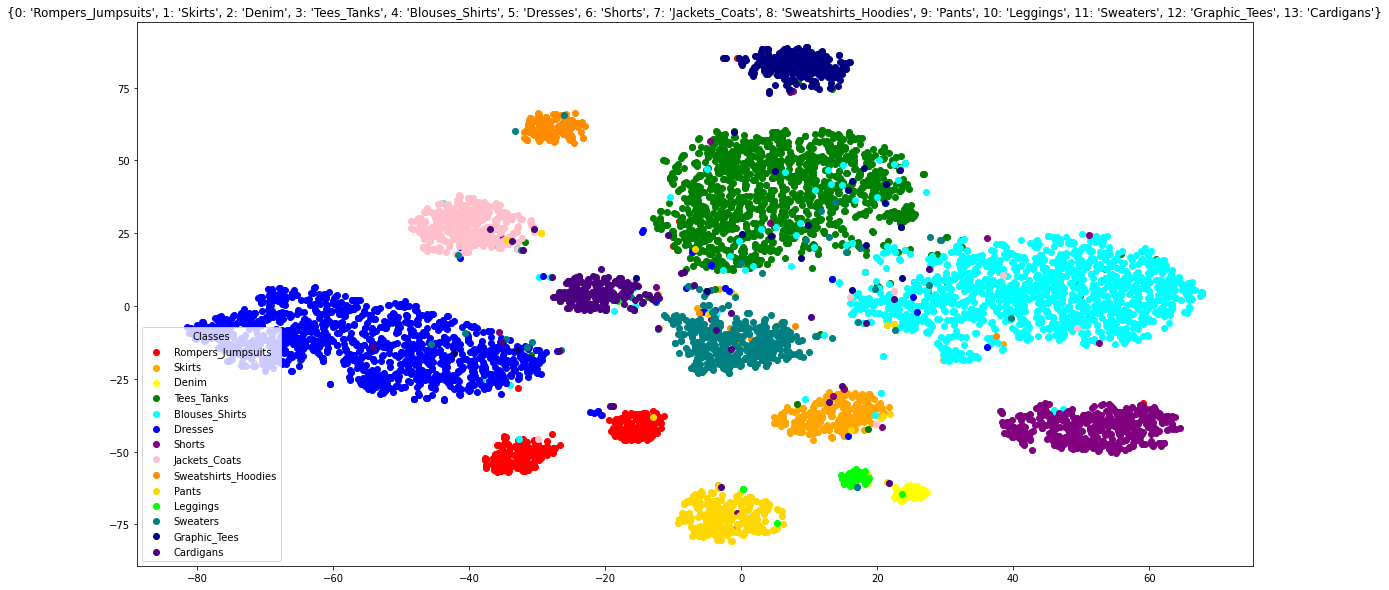

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(20,10))
sc_list = []
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple',
          'pink', 'darkorange', 'gold', 'lime', 'teal', 'navy', 'indigo']
for k in n_to_l.keys():
  sc_list.append(plt.scatter(x=to_vis[to_vis.Class == k].x, 
                             y=to_vis[to_vis.Class == k].y, 
                             c=colors[k]),
                 )
plt.title(n_to_l)
plt.legend((sc_list), 
           (n_to_l.values()),
           scatterpoints=1,
           loc="lower left",
           title="Classes")
plt.show()
plt.savefig("scatter2D.png")

In [18]:
files.download("scatter2D.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>